In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
from tqdm.notebook import tqdm

In [3]:
sys.path.append('../')

In [4]:
from core.models import rUNet
from core.utils.inference import inference_phase_rUNet
from core.utils.data import define_dataset, select_dist

ModuleNotFoundError: No module named 'torch'

In [ ]:
import torch

In [13]:
%matplotlib inline

In [14]:
regex = re.compile(r'\d+')

In [15]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions_multi_loss'

In [16]:
from functools import partial

In [17]:
root_path = partial(os.path.join, saved_models)

In [18]:
data_folder = ('/storage/yw18581/data/dataset/')

In [19]:
model_names = os.listdir(saved_models)

In [13]:
def get_fnames(coeff, prefix='Trained'):
    idx_coef = 6 if prefix=='Trained' else 4
    idx_epoch = 5 if prefix =='Trained' else 3
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith(prefix):
            if regex.findall(fname.split("_")[idx_coef])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[idx_epoch])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[idx_epoch])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [14]:
from core.utils.data.transformers import ChannelsFirst, Rescale, ToTensor, Crop, GaussianNoise, RandomCrop, Swap, \
        FlipUD, FlipLR

training_dist = [2,4,10,20,25,35]
unseen_dist = [1,3,15,30]

selected_distances = select_dist(data_folder, sorted(unseen_dist+training_dist))

selected_distances = select_dist(data_folder, sorted(unseen_dist+training_dist))

In [15]:
selected_distances = select_dist(data_folder, dist_list=[1], keys_list=['first'])

In [16]:
base_transformers = [Crop(row_slice=slice(0,1400), col_slice=slice(1000,None)),
                           Rescale(scale=0.25), ChannelsFirst(),ToTensor()]

In [17]:
data_loaders, data_length = define_dataset(root_folder=data_folder, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=16, include_list=selected_distances,
                                            alldata=True, multi_processing=4)

In [18]:
def predict_coef_epoch(coeff, epoch):
    filelist, epochs = get_fnames(coeff)
    model_fname = filelist[int(np.argwhere(epochs==epoch)[0])]
    print(model_fname)
    torch.cuda.empty_cache()
    model = rUNet(out_size=1)
    checkpoint = torch.load(root_path(model_fname))['model_state_dict']
    #print(checkpoint)
    model.load_state_dict(checkpoint)
    
    print('Checkpoint loaded')
    y_true, y_pred, fnb = inference_phase_rUNet(model, data_loaders, data_length,
                          batch_size=16, test=False)

    return y_true, y_pred, fnb

In [19]:
y_true_first_1mm, y_pred_first_1mm, fnb = predict_coef_epoch(4,100)

Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:19,  1.01s/it]                        


(0, 4)

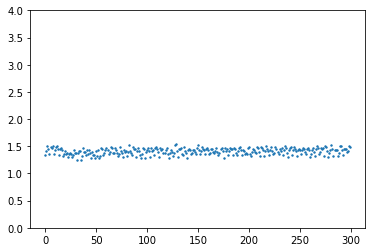

In [24]:
plt.scatter(np.arange(0,300), y_pred_first_1mm[np.argsort(fnb)], s=2)
plt.ylim(0,4)

In [25]:
selected_distances = select_dist(data_folder, dist_list=[1], keys_list=['second'])

In [26]:
data_loaders, data_length = define_dataset(root_folder=data_folder, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=16, include_list=selected_distances,
                                            alldata=True, multi_processing=4)

In [27]:
y_true_second_1mm, y_pred_second_1mm, fnb_second_1 = predict_coef_epoch(4,100)

Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:18,  1.03it/s]                        


(0, 4)

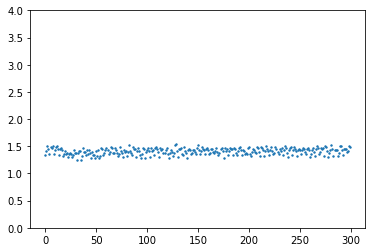

In [28]:
plt.scatter(np.arange(0,300), y_pred_first_1mm[np.argsort(fnb_second_1)], s=2)
plt.ylim(0,4)

Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:13,  4.31s/it]


Batch:  17%|█▋        | 3/18 [00:04<00:45,  3.05s/it]


Batch:  28%|██▊       | 5/18 [00:07<00:34,  2.64s/it]


Batch:  39%|███▉      | 7/18 [00:08<00:20,  1.87s/it]


Batch:  50%|█████     | 9/18 [00:11<00:16,  1.87s/it]


Batch:  61%|██████    | 11/18 [00:11<00:09,  1.33s/it]


Batch:  72%|███████▏  | 13/18 [00:16<00:07,  1.56s/it]


Batch:  83%|████████▎ | 15/18 [00:16<00:03,  1.12s/it]


Batch:  94%|█████████▍| 17/18 [00:18<00:01,  1.16s/it]


Batch: 19it [00:19,  1.00s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:03<00:59,  3.52s/it]


Batch:  11%|█         | 2/18 [00:04<00:42,  2.69s/it]


Batch:  17%|█▋        | 3/18 [00:04<00:28,  1.92s/it]


Batch:  28%|██▊       | 5/18 [00:07<00:22,  1.76s/it]


Batch:  33%|███▎      | 6/18 [00:08<00:18,  1.54s/it]


Batch:  44%|████▍     | 8/18 [00:08<00:11,  1.10s/it]


Batch:  50%|█████     | 9/18 [00:11<00:16,  1.81s/it]


Batch:  56%|█████▌    | 10/18 [00:12<00:12,  1.60s/it]


Batch:  67%|██████▋   | 12/18 [00:13<00:06,  1.14s/it]


Batch:  72%|███████▏  | 13/18 [00:16<00:08,  1.76s/it]


Batch:  78%|███████▊  | 14/18 [00:17<00:06,  1.57s/it]


Batch:  89%|████████▉ | 16/18 [00:17<00:02,  1.15s/it]


Batch:  94%|█████████▍| 17/18 [00:20<00:01,  1.56s/it]


Batch: 19it [00:21,  1.12s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:23,  4.90s/it]


Batch:  11%|█         | 2/18 [00:05<00:55,  3.47s/it]


Batch:  22%|██▏       | 4/18 [00:05<00:34,  2.45s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:39,  3.05s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:23,  2.16s/it]


Batch:  50%|█████     | 9/18 [00:14<00:19,  2.22s/it]


Batch:  61%|██████    | 11/18 [00:14<00:11,  1.57s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.81s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.28s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.46s/it]


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:30,  5.34s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:56,  3.76s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:42,  3.31s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:25,  2.34s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.29s/it]


Batch:  61%|██████    | 11/18 [00:14<00:11,  1.63s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.80s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.28s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.45s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:28,  5.19s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:55,  3.70s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:42,  3.24s/it]


Batch:  33%|███▎      | 6/18 [00:10<00:27,  2.32s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:18,  1.68s/it]


Batch:  50%|█████     | 9/18 [00:14<00:16,  1.78s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:11,  1.38s/it]


Batch:  67%|██████▋   | 12/18 [00:15<00:06,  1.03s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.89s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:06,  1.56s/it]


Batch:  83%|████████▎ | 15/18 [00:20<00:03,  1.12s/it]


Batch:  89%|████████▉ | 16/18 [00:20<00:01,  1.22it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.44s/it]


Batch: 19it [00:23,  1.25s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:28,  5.19s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:54,  3.66s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:41,  3.22s/it]


Batch:  33%|███▎      | 6/18 [00:10<00:28,  2.38s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:19,  1.73s/it]


Batch:  50%|█████     | 9/18 [00:14<00:16,  1.83s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:11,  1.39s/it]


Batch:  61%|██████    | 11/18 [00:15<00:07,  1.07s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:06,  1.33s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:04,  1.06s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:01,  1.31it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.54s/it]


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:13,  4.32s/it]


Batch:  11%|█         | 2/18 [00:04<00:48,  3.05s/it]


Batch:  17%|█▋        | 3/18 [00:04<00:32,  2.17s/it]


Batch:  28%|██▊       | 5/18 [00:08<00:27,  2.11s/it]


Batch:  39%|███▉      | 7/18 [00:08<00:16,  1.50s/it]


Batch:  50%|█████     | 9/18 [00:13<00:16,  1.79s/it]


Batch:  61%|██████    | 11/18 [00:13<00:08,  1.27s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:07,  1.54s/it]


Batch:  83%|████████▎ | 15/18 [00:18<00:03,  1.10s/it]


Batch:  94%|█████████▍| 17/18 [00:21<00:01,  1.28s/it]


Batch: 19it [00:21,  1.15s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:27,  5.12s/it]


Batch:  11%|█         | 2/18 [00:05<00:57,  3.62s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:38,  2.58s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:32,  2.51s/it]


Batch:  33%|███▎      | 6/18 [00:10<00:22,  1.91s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:13,  1.36s/it]


Batch:  50%|█████     | 9/18 [00:14<00:19,  2.16s/it]


Batch:  56%|█████▌    | 10/18 [00:15<00:13,  1.72s/it]


Batch:  61%|██████    | 11/18 [00:15<00:08,  1.23s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:06,  1.40s/it]


Batch:  78%|███████▊  | 14/18 [00:20<00:04,  1.24s/it]


Batch:  89%|████████▉ | 16/18 [00:20<00:01,  1.12it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.45s/it]


Batch: 19it [00:23,  1.25s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/14 [00:00<?, ?it/s]


Batch:   7%|▋         | 1/14 [00:05<01:09,  5.31s/it]


Batch:  21%|██▏       | 3/14 [00:05<00:41,  3.74s/it]


Batch:  36%|███▌      | 5/14 [00:10<00:29,  3.32s/it]


Batch:  43%|████▎     | 6/14 [00:10<00:19,  2.38s/it]


Batch:  57%|█████▋    | 8/14 [00:10<00:10,  1.69s/it]


Batch:  64%|██████▍   | 9/14 [00:14<00:11,  2.39s/it]


Batch:  71%|███████▏  | 10/14 [00:14<00:07,  1.79s/it]


Batch:  86%|████████▌ | 12/14 [00:15<00:02,  1.28s/it]


Batch:  93%|█████████▎| 13/14 [00:17<00:01,  1.65s/it]


Batch: 15it [00:17,  1.20s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:27,  5.13s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:54,  3.62s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:41,  3.22s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.27s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.26s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:13,  1.72s/it]


Batch:  67%|██████▋   | 12/18 [00:15<00:07,  1.23s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:10,  2.05s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:06,  1.55s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:02,  1.10s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.79s/it]


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:26,  5.06s/it]


Batch:  11%|█         | 2/18 [00:05<00:57,  3.59s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:38,  2.54s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:31,  2.45s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:19,  1.74s/it]


Batch:  50%|█████     | 9/18 [00:14<00:17,  1.90s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:11,  1.47s/it]


Batch:  61%|██████    | 11/18 [00:15<00:07,  1.06s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:06,  1.37s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:04,  1.13s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:01,  1.23it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.43s/it]


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:22,  4.84s/it]


Batch:  11%|█         | 2/18 [00:05<00:55,  3.48s/it]


Batch:  22%|██▏       | 4/18 [00:05<00:34,  2.46s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:39,  3.01s/it]


Batch:  33%|███▎      | 6/18 [00:09<00:26,  2.17s/it]


Batch:  44%|████▍     | 8/18 [00:09<00:15,  1.54s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.33s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:13,  1.69s/it]


Batch:  67%|██████▋   | 12/18 [00:14<00:07,  1.20s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:10,  2.15s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:04,  1.54s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.66s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:20,  4.73s/it]


Batch:  11%|█         | 2/18 [00:04<00:54,  3.38s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:36,  2.41s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:30,  2.31s/it]


Batch:  33%|███▎      | 6/18 [00:09<00:20,  1.75s/it]


Batch:  44%|████▍     | 8/18 [00:09<00:12,  1.24s/it]


Batch:  50%|█████     | 9/18 [00:13<00:18,  2.06s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:12,  1.57s/it]


Batch:  61%|██████    | 11/18 [00:14<00:08,  1.18s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:07,  1.45s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:04,  1.13s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:01,  1.23it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.63s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:23,  4.93s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:52,  3.49s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:41,  3.19s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:24,  2.26s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:16,  1.65s/it]


Batch:  50%|█████     | 9/18 [00:14<00:22,  2.46s/it]


Batch:  61%|██████    | 11/18 [00:15<00:12,  1.74s/it]


Batch:  67%|██████▋   | 12/18 [00:15<00:07,  1.29s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:11,  2.29s/it]


Batch:  83%|████████▎ | 15/18 [00:20<00:05,  1.71s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.67s/it]


Batch: 19it [00:23,  1.26s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:24,  4.97s/it]


Batch:  11%|█         | 2/18 [00:05<00:56,  3.52s/it]


Batch:  22%|██▏       | 4/18 [00:05<00:34,  2.49s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:38,  2.99s/it]


Batch:  33%|███▎      | 6/18 [00:09<00:25,  2.14s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:17,  1.56s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:11,  1.16s/it]


Batch:  50%|█████     | 9/18 [00:13<00:17,  1.96s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:11,  1.49s/it]


Batch:  61%|██████    | 11/18 [00:14<00:07,  1.11s/it]


Batch:  67%|██████▋   | 12/18 [00:14<00:04,  1.22it/s]


Batch:  72%|███████▏  | 13/18 [00:18<00:08,  1.69s/it]


Batch:  78%|███████▊  | 14/18 [00:18<00:05,  1.31s/it]


Batch:  83%|████████▎ | 15/18 [00:18<00:02,  1.04it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.21s/it]


Batch: 19it [00:22,  1.20s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:22,  4.83s/it]


Batch:  11%|█         | 2/18 [00:04<00:54,  3.42s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:37,  2.53s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:31,  2.42s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:18,  1.72s/it]


Batch:  50%|█████     | 9/18 [00:14<00:16,  1.85s/it]


Batch:  61%|██████    | 11/18 [00:14<00:09,  1.37s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:08,  1.63s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.16s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.35s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:27,  5.13s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:54,  3.62s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:41,  3.19s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.26s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.33s/it]


Batch:  61%|██████    | 11/18 [00:15<00:11,  1.65s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:08,  1.79s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:05,  1.30s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:01,  1.07it/s]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.82s/it]


Batch: 19it [00:23,  1.25s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:23,  4.91s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:51,  3.46s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:40,  3.12s/it]


Batch:  33%|███▎      | 6/18 [00:10<00:27,  2.32s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:16,  1.65s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.32s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:14,  1.75s/it]


Batch:  67%|██████▋   | 12/18 [00:14<00:07,  1.25s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:10,  2.12s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:06,  1.58s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:02,  1.13s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.79s/it]


Batch: 19it [00:23,  1.21s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:23,  4.89s/it]


Batch:  11%|█         | 2/18 [00:05<00:55,  3.48s/it]


Batch:  22%|██▏       | 4/18 [00:05<00:34,  2.46s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:39,  3.05s/it]


Batch:  33%|███▎      | 6/18 [00:09<00:26,  2.18s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:17,  1.58s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:11,  1.16s/it]


Batch:  50%|█████     | 9/18 [00:14<00:18,  2.03s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:12,  1.52s/it]


Batch:  61%|██████    | 11/18 [00:14<00:07,  1.13s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:07,  1.40s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:04,  1.11s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:01,  1.23it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.58s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:21,  4.81s/it]


Batch:  11%|█         | 2/18 [00:04<00:54,  3.42s/it]


Batch:  22%|██▏       | 4/18 [00:05<00:33,  2.42s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:38,  2.98s/it]


Batch:  33%|███▎      | 6/18 [00:09<00:25,  2.11s/it]


Batch:  44%|████▍     | 8/18 [00:09<00:15,  1.50s/it]


Batch:  50%|█████     | 9/18 [00:14<00:21,  2.38s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:13,  1.71s/it]


Batch:  61%|██████    | 11/18 [00:14<00:08,  1.23s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:07,  1.50s/it]


Batch:  78%|███████▊  | 14/18 [00:18<00:04,  1.16s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:02,  1.14it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.12s/it]


Batch: 19it [00:23,  1.21s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:34,  5.54s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:58,  3.90s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:44,  3.41s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:26,  2.41s/it]


Batch:  50%|█████     | 9/18 [00:14<00:21,  2.37s/it]


Batch:  61%|██████    | 11/18 [00:15<00:11,  1.68s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.88s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:04,  1.34s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.51s/it]


Batch: 19it [00:23,  1.26s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:24,  4.99s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:52,  3.52s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:40,  3.12s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.20s/it]


Batch:  50%|█████     | 9/18 [00:14<00:19,  2.20s/it]


Batch:  61%|██████    | 11/18 [00:14<00:10,  1.56s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:08,  1.73s/it]


Batch:  78%|███████▊  | 14/18 [00:18<00:05,  1.27s/it]


Batch:  83%|████████▎ | 15/18 [00:18<00:02,  1.08it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.18s/it]


Batch: 19it [00:22,  1.19s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:24,  4.99s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:52,  3.51s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:40,  3.13s/it]


Batch:  33%|███▎      | 6/18 [00:09<00:27,  2.28s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:16,  1.62s/it]


Batch:  50%|█████     | 9/18 [00:14<00:21,  2.43s/it]


Batch:  61%|██████    | 11/18 [00:14<00:12,  1.72s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:09,  1.88s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:04,  1.34s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.46s/it]


Batch: 19it [00:22,  1.21s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:32,  5.45s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:57,  3.84s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:44,  3.45s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:26,  2.45s/it]


Batch:  50%|█████     | 9/18 [00:15<00:21,  2.35s/it]


Batch:  61%|██████    | 11/18 [00:15<00:11,  1.71s/it]


Batch:  67%|██████▋   | 12/18 [00:15<00:07,  1.22s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:10,  2.10s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:06,  1.50s/it]


Batch:  83%|████████▎ | 15/18 [00:20<00:03,  1.14s/it]


Batch:  89%|████████▉ | 16/18 [00:20<00:01,  1.18it/s]


Batch:  94%|█████████▍| 17/18 [00:24<00:01,  1.72s/it]


Batch: 19it [00:24,  1.28s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:27,  5.14s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:54,  3.63s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:41,  3.19s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.26s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.27s/it]


Batch:  61%|██████    | 11/18 [00:14<00:11,  1.62s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:08,  1.78s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.29s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.44s/it]


Batch: 19it [00:23,  1.21s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:29,  5.29s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:55,  3.72s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:43,  3.31s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:25,  2.35s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.31s/it]


Batch:  61%|██████    | 11/18 [00:14<00:11,  1.64s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.86s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.32s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.46s/it]


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:25,  5.03s/it]


Batch:  11%|█         | 2/18 [00:05<00:57,  3.60s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:38,  2.55s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:32,  2.48s/it]


Batch:  33%|███▎      | 6/18 [00:10<00:21,  1.79s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:14,  1.34s/it]


Batch:  50%|█████     | 9/18 [00:14<00:14,  1.60s/it]


Batch:  61%|██████    | 11/18 [00:15<00:08,  1.19s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:07,  1.48s/it]


Batch:  78%|███████▊  | 14/18 [00:19<00:04,  1.09s/it]


Batch:  83%|████████▎ | 15/18 [00:20<00:02,  1.17it/s]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.10s/it]


Batch: 19it [00:24,  1.26s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:22,  4.86s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:51,  3.43s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:40,  3.08s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.19s/it]


Batch:  44%|████▍     | 8/18 [00:10<00:16,  1.64s/it]


Batch:  50%|█████     | 9/18 [00:14<00:21,  2.42s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:13,  1.73s/it]


Batch:  67%|██████▋   | 12/18 [00:14<00:07,  1.23s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:11,  2.20s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:04,  1.59s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.63s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:25,  5.02s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:53,  3.54s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:41,  3.23s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:25,  2.28s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.26s/it]


Batch:  61%|██████    | 11/18 [00:14<00:11,  1.61s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:08,  1.77s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.26s/it]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.41s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:19,  4.70s/it]


Batch:  17%|█▋        | 3/18 [00:04<00:49,  3.31s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:39,  3.02s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:23,  2.15s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.25s/it]


Batch:  61%|██████    | 11/18 [00:14<00:11,  1.60s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.84s/it]


Batch:  83%|████████▎ | 15/18 [00:19<00:03,  1.31s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.42s/it]


Batch: 19it [00:23,  1.23s/it]                        


Text(0, 0.5, 'reconstructed position')

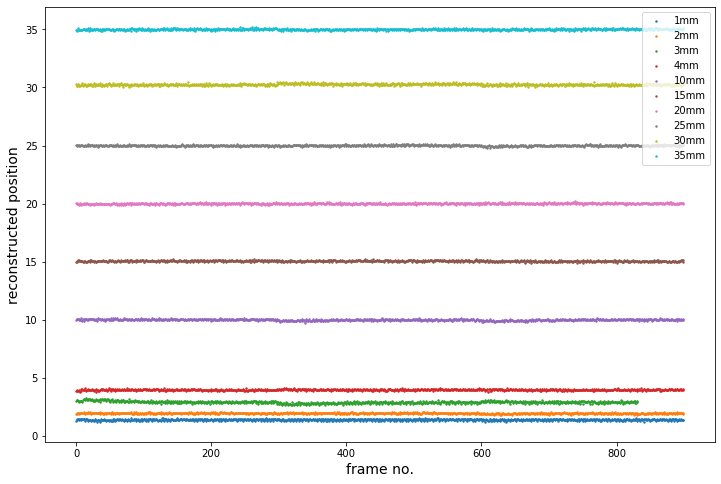

In [78]:
plt.figure(figsize=(12,8))
for dist in [1,2,3,4,10,15,20,25,30,35]:
    y_true_dist = []
    y_pred_dist = []
    fnb_dist = []
    for i, key in enumerate(['first', 'second', 'third']):    
        selected_distances = select_dist(data_folder, dist_list=[dist], keys_list=[key])
        data_loaders, data_length = define_dataset(root_folder=data_folder, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=16, include_list=selected_distances,
                                            alldata=True, multi_processing=4)
        y_true_key, y_pred_key, fnb_key = predict_coef_epoch(4,100)
        #y_true_dist.append(y_true_key[np.argsort(fnb_key)])
        y_pred_dist.append(y_pred_key[np.argsort(fnb_key)])  
    plt.scatter(np.arange(len(np.hstack(y_pred_dist))), np.hstack(y_pred_dist), s=2, label='{}mm'.format(dist))
    
plt.legend(loc='upper right')
plt.xlabel('frame no.', fontsize=14)
plt.ylabel('reconstructed position', fontsize=14)

Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:04<01:24,  4.95s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:53,  3.54s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:40,  3.08s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.21s/it]


Batch:  50%|█████     | 9/18 [00:14<00:19,  2.18s/it]


Batch:  61%|██████    | 11/18 [00:14<00:10,  1.57s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:08,  1.71s/it]


Batch:  78%|███████▊  | 14/18 [00:18<00:05,  1.25s/it]


Batch:  83%|████████▎ | 15/18 [00:18<00:02,  1.02it/s]


Batch:  94%|█████████▍| 17/18 [00:22<00:01,  1.23s/it]


Batch: 19it [00:22,  1.20s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:27,  5.13s/it]


Batch:  17%|█▋        | 3/18 [00:05<00:54,  3.61s/it]


Batch:  28%|██▊       | 5/18 [00:09<00:41,  3.21s/it]


Batch:  39%|███▉      | 7/18 [00:09<00:24,  2.27s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.24s/it]


Batch:  56%|█████▌    | 10/18 [00:14<00:12,  1.61s/it]


Batch:  67%|██████▋   | 12/18 [00:14<00:06,  1.15s/it]


Batch:  72%|███████▏  | 13/18 [00:18<00:10,  2.08s/it]


Batch:  78%|███████▊  | 14/18 [00:18<00:05,  1.50s/it]


Batch:  89%|████████▉ | 16/18 [00:19<00:02,  1.07s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.91s/it]


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded





Batch:   0%|          | 0/18 [00:00<?, ?it/s]


Batch:   6%|▌         | 1/18 [00:05<01:26,  5.09s/it]


Batch:  11%|█         | 2/18 [00:05<00:58,  3.68s/it]


Batch:  22%|██▏       | 4/18 [00:05<00:36,  2.60s/it]


Batch:  28%|██▊       | 5/18 [00:10<00:41,  3.16s/it]


Batch:  39%|███▉      | 7/18 [00:10<00:24,  2.24s/it]


Batch:  50%|█████     | 9/18 [00:14<00:20,  2.26s/it]


Batch:  61%|██████    | 11/18 [00:15<00:11,  1.61s/it]


Batch:  72%|███████▏  | 13/18 [00:19<00:09,  1.84s/it]


Batch:  83%|████████▎ | 15/18 [00:20<00:03,  1.31s/it]


Batch:  94%|█████████▍| 17/18 [00:23<00:01,  1.50s/it]


Batch: 19it [00:24,  1.27s/it]                        


Text(0, 0.5, 'reconstructed position')

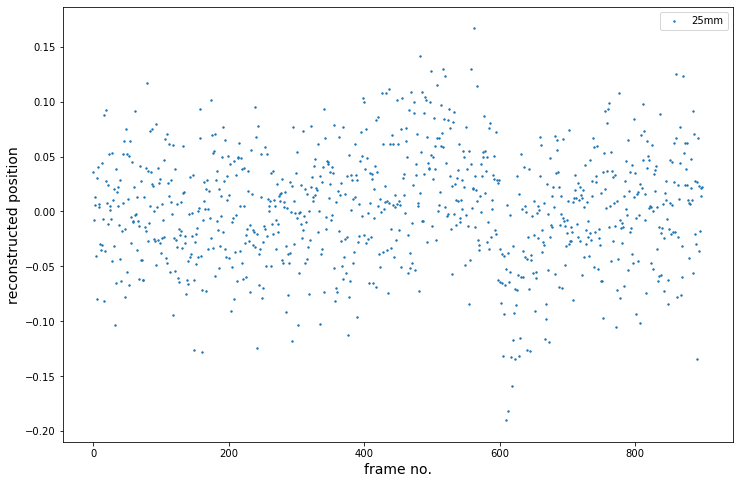

In [79]:
plt.figure(figsize=(12,8))
for dist in [25]:
    y_true_dist = []
    y_pred_dist = []
    fnb_dist = []
    for i, key in enumerate(['first', 'second', 'third']):    
        selected_distances = select_dist(data_folder, dist_list=[dist], keys_list=[key])
        data_loaders, data_length = define_dataset(root_folder=data_folder, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=16, include_list=selected_distances,
                                            alldata=True, multi_processing=4)
        y_true_key, y_pred_key, fnb_key = predict_coef_epoch(4,100)
        #y_true_dist.append(y_true_key[np.argsort(fnb_key)])
        y_pred_dist.append(y_pred_key[np.argsort(fnb_key)])  
    plt.scatter(np.arange(len(np.hstack(y_pred_dist))), np.hstack(y_pred_dist)-25, s=2, label='{}mm'.format(dist))
    
plt.legend(loc='upper right')
plt.xlabel('frame no.', fontsize=14)
plt.ylabel('reconstructed position', fontsize=14)

In [19]:
y_pred = []
for dist in [1, 2, 3, 4, 10, 15, 20, 25, 30, 35]:
    
    y_true_dist = []
    y_pred_dist = []
    fnb_dist = []
    for i, key in enumerate(['first', 'second', 'third']):    
        selected_distances = select_dist(data_folder, dist_list=[dist], keys_list=[key])
        data_loaders, data_length = define_dataset(root_folder=data_folder, base_transformers=base_transformers,
                                           train_transformers=base_transformers,
                                           batch_size=16, include_list=selected_distances,
                                            alldata=True, multi_processing=4)
        y_true_key, y_pred_key, fnb_key = predict_coef_epoch(4,100)
        #y_true_dist.append(y_true_key[np.argsort(fnb_key)])
        y_pred_dist.append(y_pred_key[np.argsort(fnb_key)])
    y_pred.append(np.hstack(y_pred_dist))
   

Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:22,  1.21s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:24,  1.27s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 15it [00:18,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.25s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.25s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:22,  1.21s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:22,  1.20s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.23s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.25s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.24s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:22,  1.20s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.22s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:22,  1.20s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.26s/it]                        


Trained_rUNet_pytorch_6positions_dataset_100epochs_0.4coeff_mask.pkl
Checkpoint loaded


Batch: 19it [00:23,  1.23s/it]                        


In [21]:
np.savez_compressed('predicted_alldata.npz', pred=y_pred)

In [85]:
np.vstack((np.hstack(y_pred_dist), np.hstack(y_pred_dist))).shape

(2, 900)

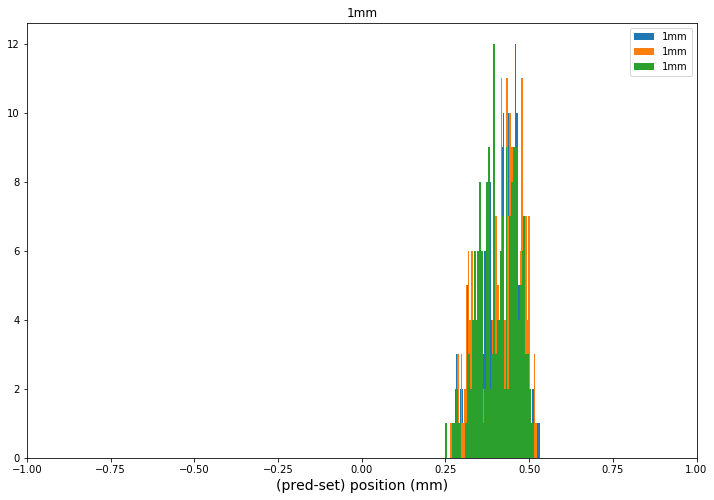

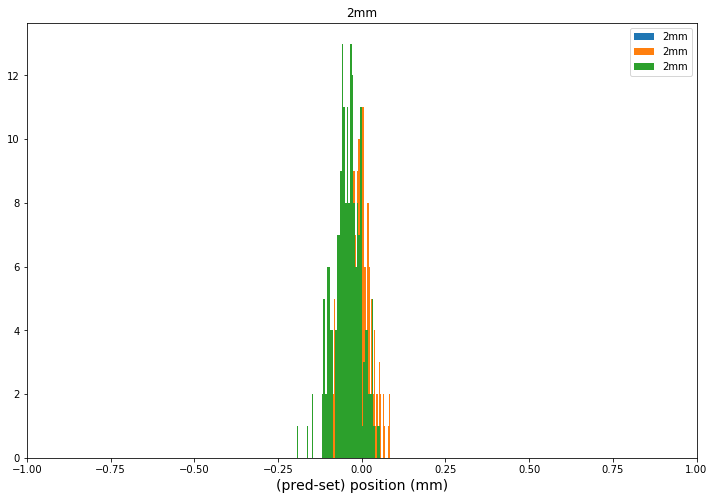

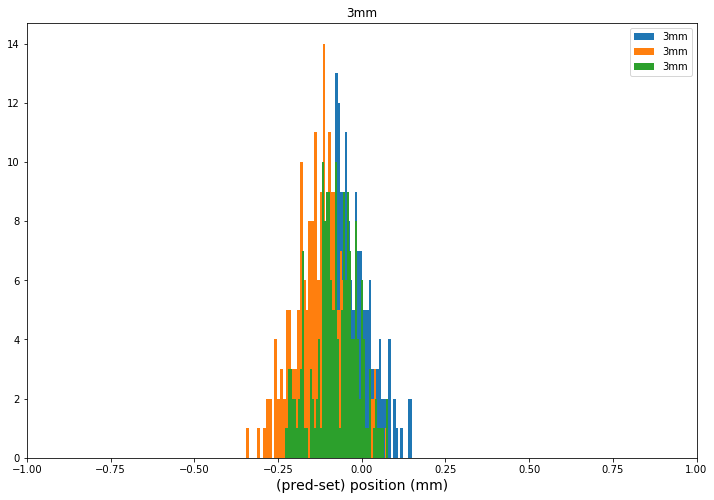

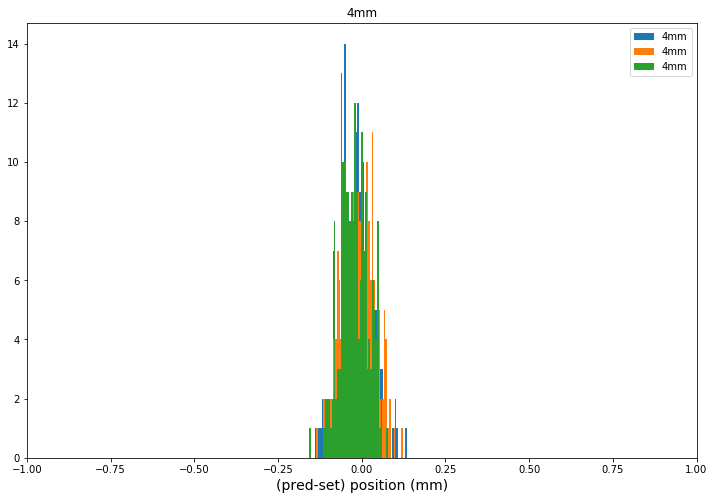

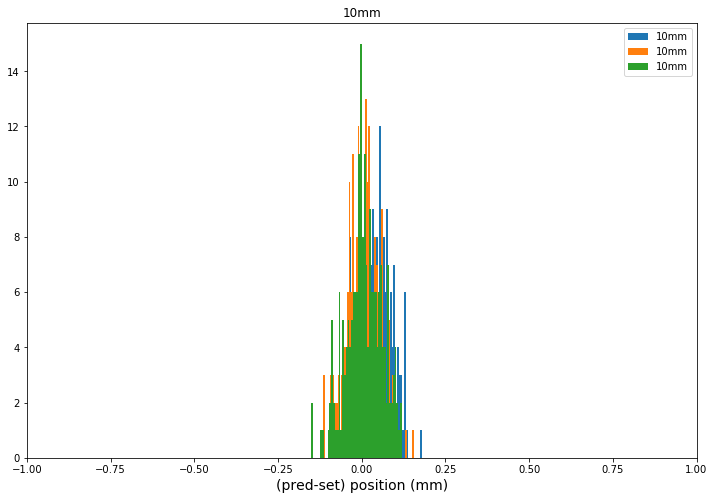

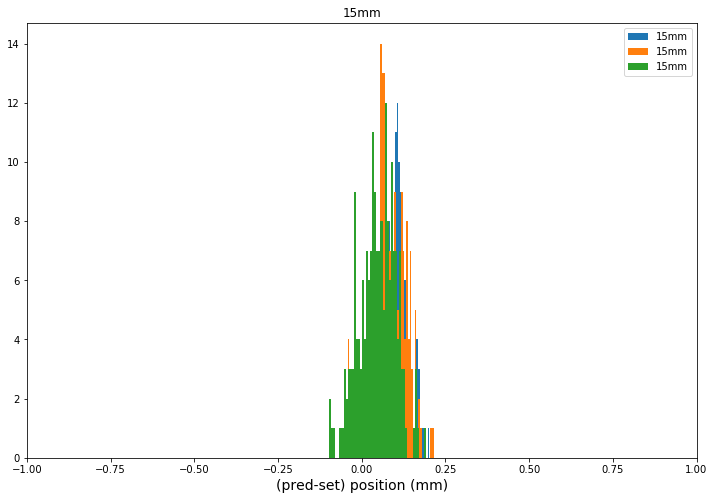

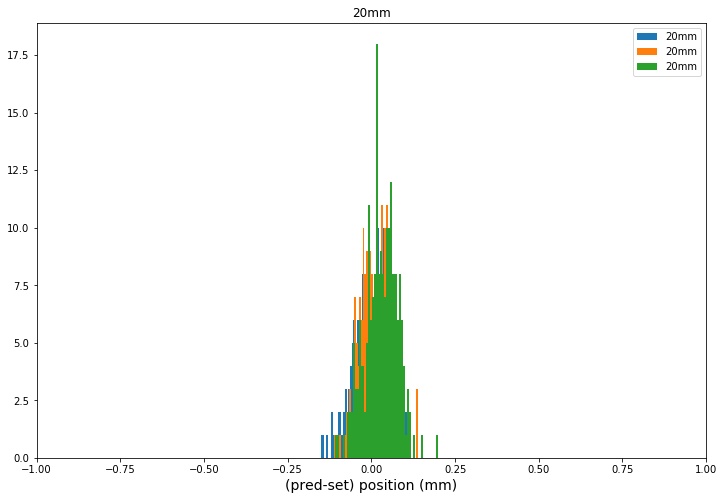

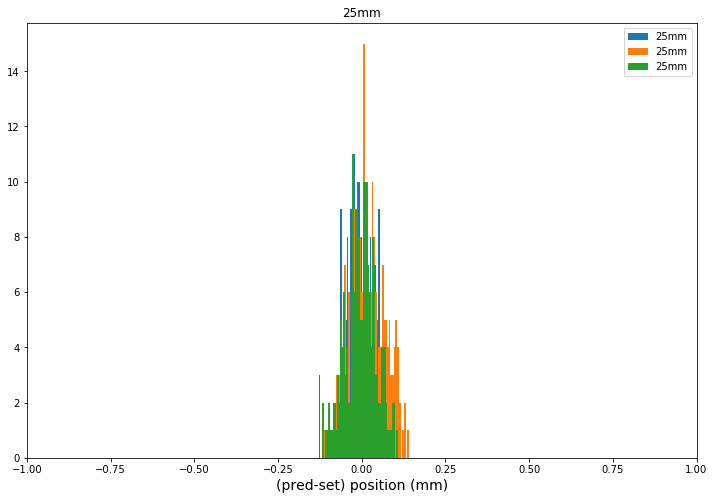

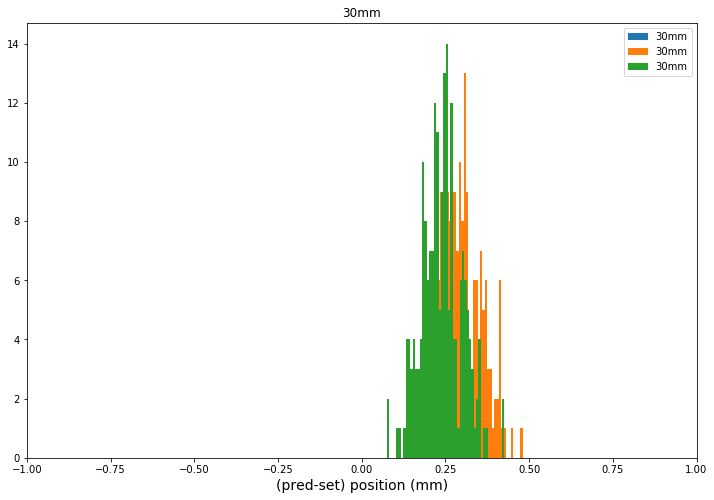

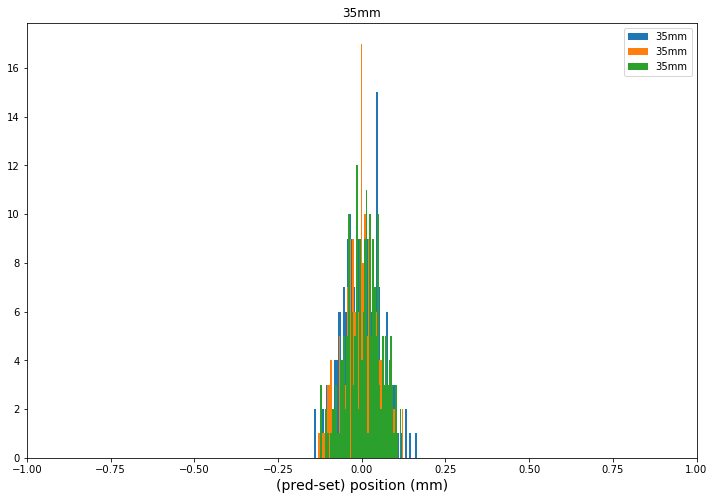

In [103]:

for i, dist in enumerate([1, 2, 3, 4, 10, 15, 20, 25, 30, 35]):
    plt.figure(figsize=(12,8))
    #plt.scatter(np.arange(200), y_pred[i][50:250]-dist, label='{}mm'.format(dist), s=2)
    plt.hist(y_pred[i][50:250]-dist, bins=50, label='{}mm'.format(dist))
    plt.hist(y_pred[i][350:550]-dist, bins=50, label='{}mm'.format(dist))
    plt.hist(y_pred[i][650:850]-dist, bins=50, label='{}mm'.format(dist))
    plt.xlabel('(pred-set) position (mm)', fontsize=14)
    #plt.ylabel('reconstructed position', fontsize=14)
    plt.title('{}mm'.format(dist))
    plt.legend(loc='upper right')
    plt.xlim(-1,1)
    if dist==15:
        plt.savefig('residual_distribution_15mm_subset.png')
    plt.show()

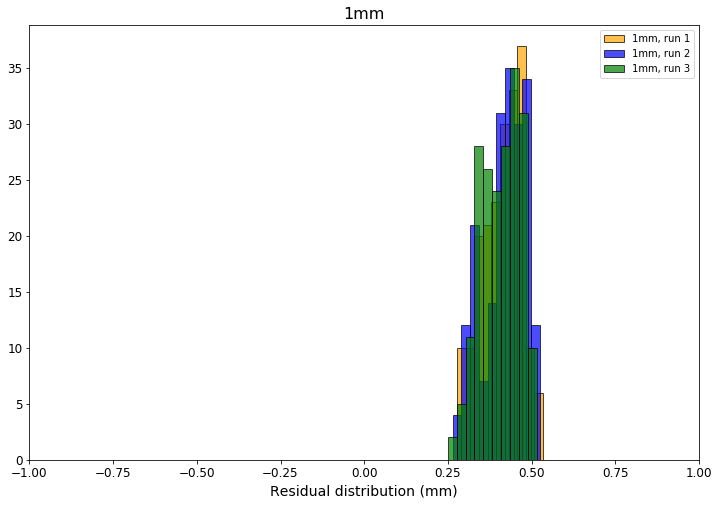

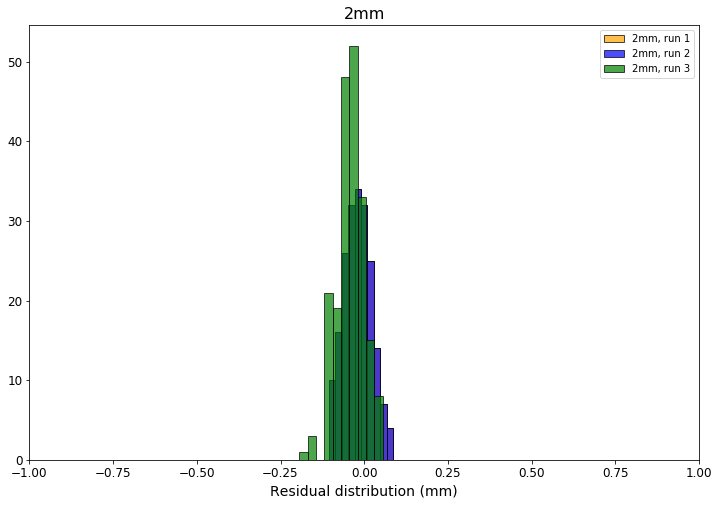

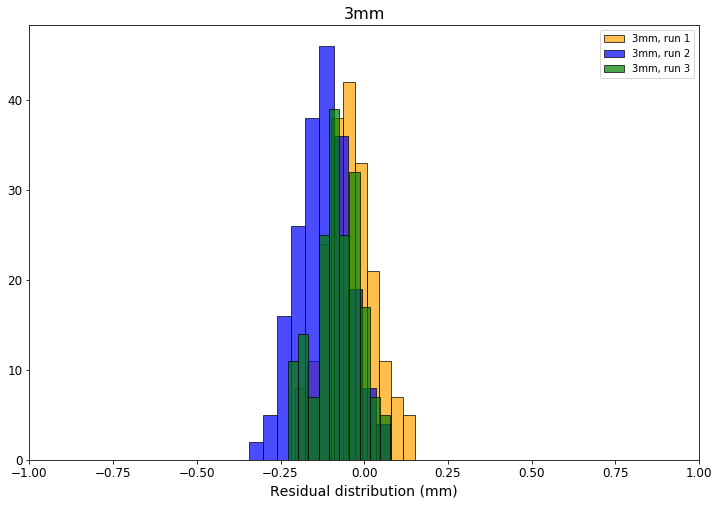

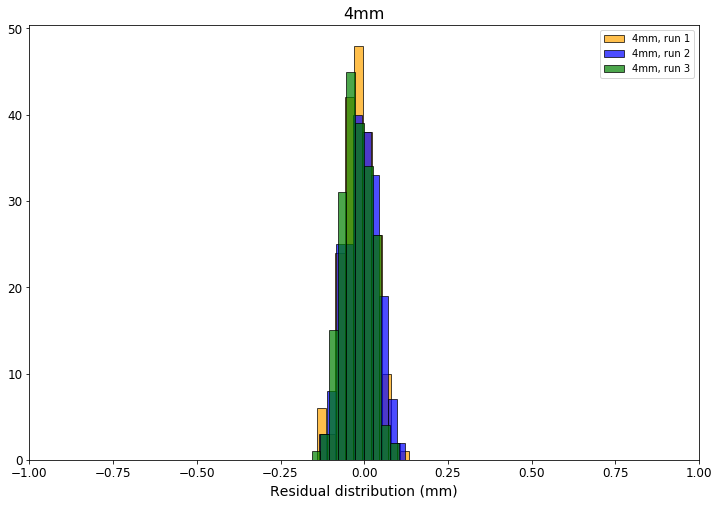

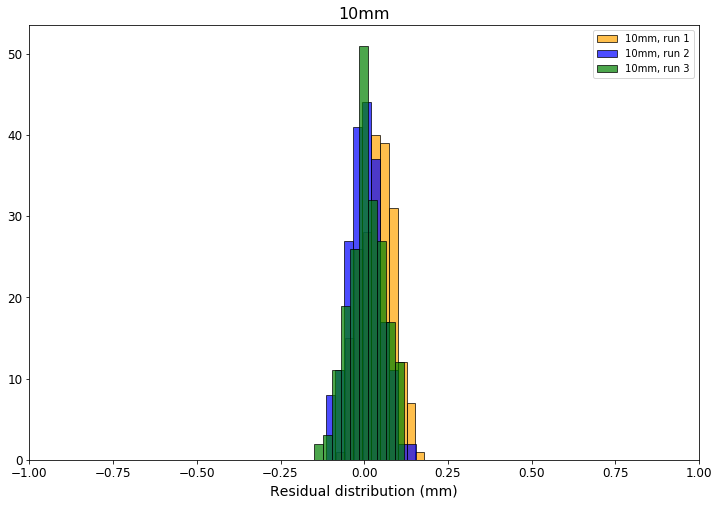

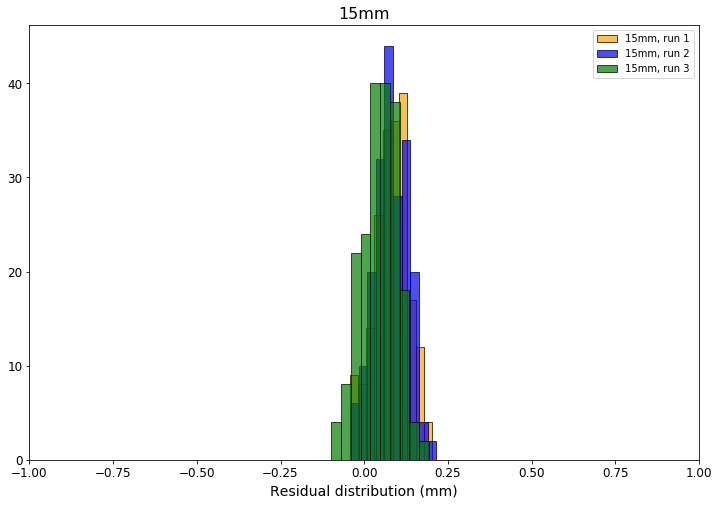

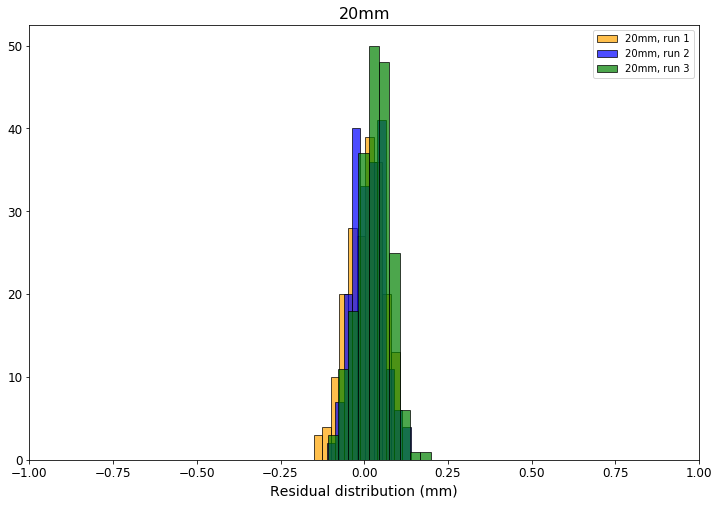

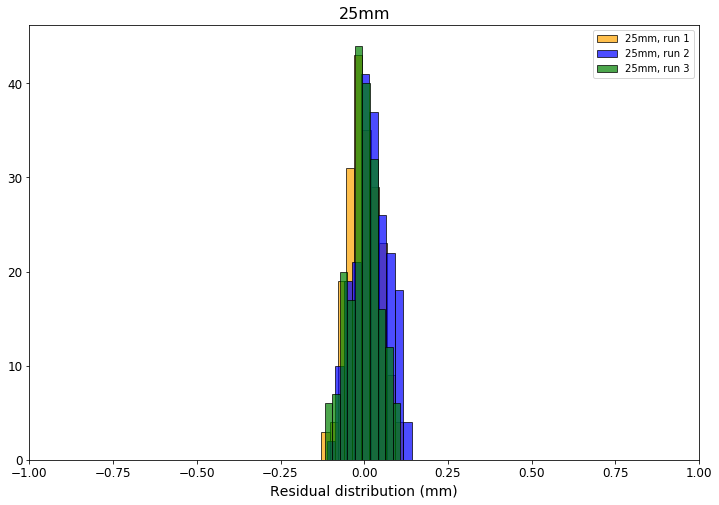

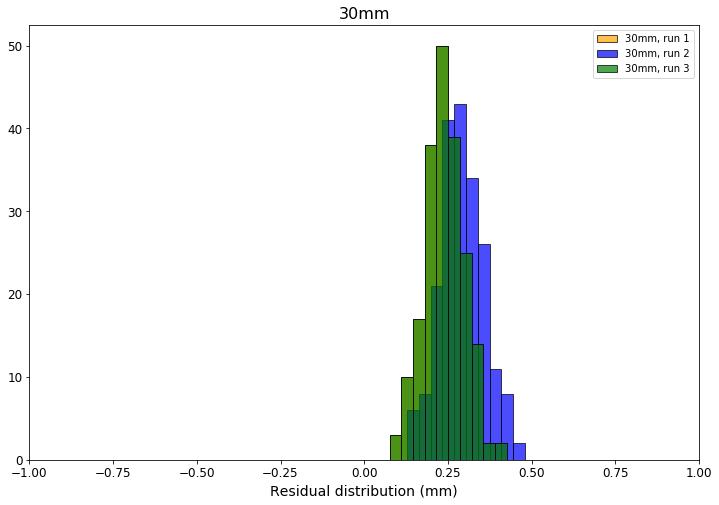

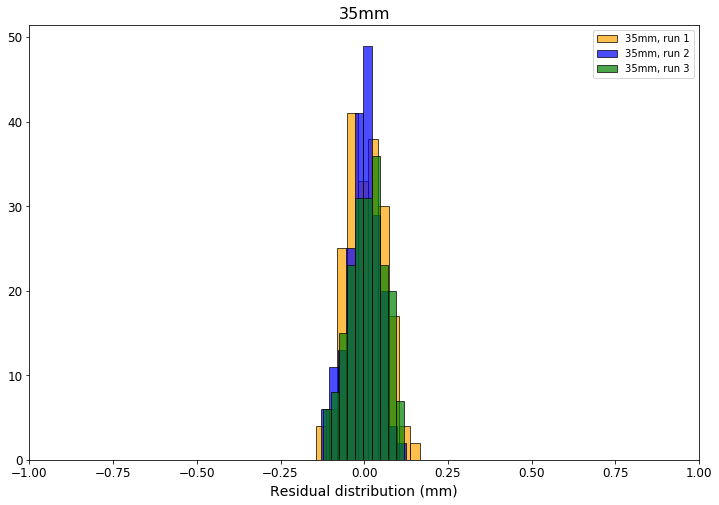

In [44]:
n_bins = 10
for i, dist in enumerate([1, 2, 3, 4, 10, 15, 20, 25, 30, 35]):
    plt.figure(figsize=(12,8))
    #plt.scatter(np.arange(200), y_pred[i][50:250]-dist, label='{}mm'.format(dist), s=2)
    plt.hist(y_pred[i][50:250]-dist, edgecolor= 'k', color='orange', 
             bins=n_bins, label='{}mm, run 1'.format(dist), alpha=0.7)
    plt.hist(y_pred[i][350:550]-dist, edgecolor= 'k', color='blue',
             bins=n_bins, label='{}mm, run 2'.format(dist), alpha=0.7)
    plt.hist(y_pred[i][650:850]-dist, edgecolor= 'k',color='green', 
             bins=n_bins, label='{}mm, run 3'.format(dist), alpha=0.7)
    plt.xlabel('Residual distribution (mm)', fontsize=14)
    #plt.ylabel('reconstructed position', fontsize=14)
    plt.title('{}mm'.format(dist), fontsize=16)
    plt.legend(loc='upper right')
    plt.xlim(-1,1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if dist==15:
        plt.savefig('residual_distribution_15mm_subset.png')
        plt.show()

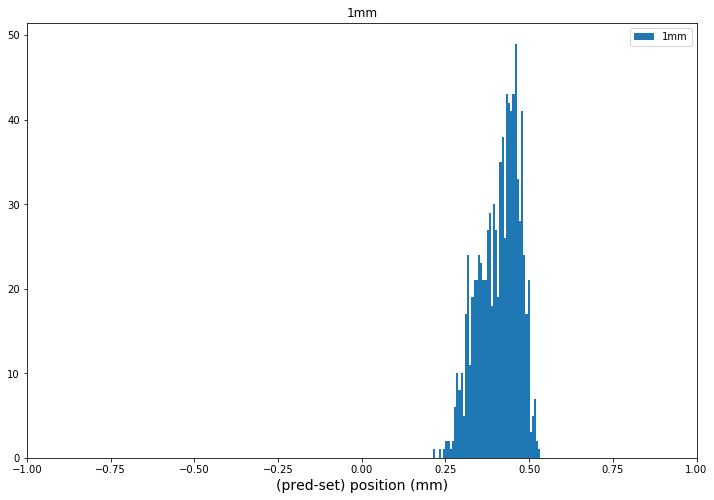

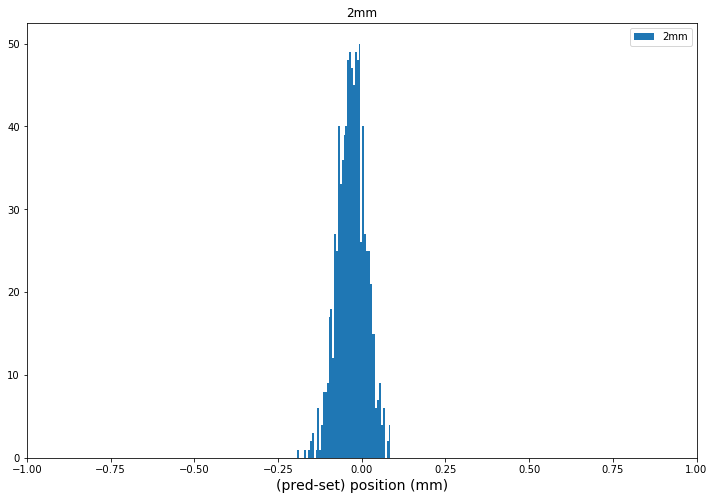

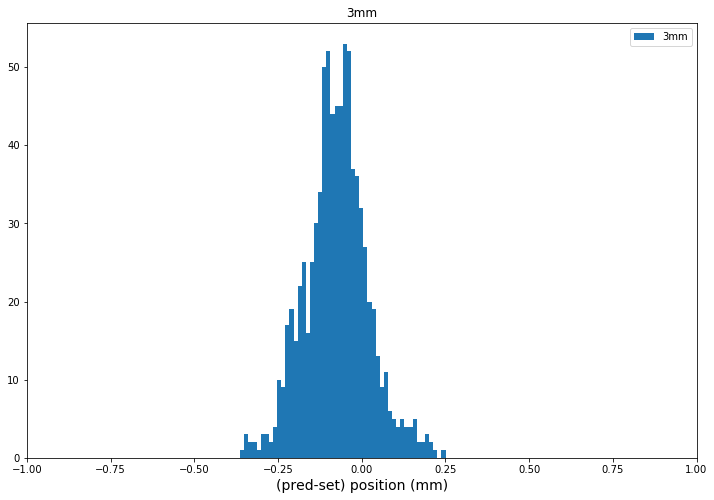

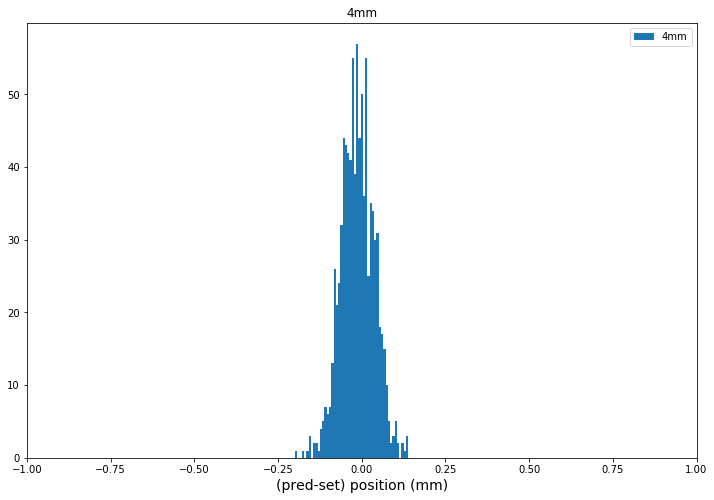

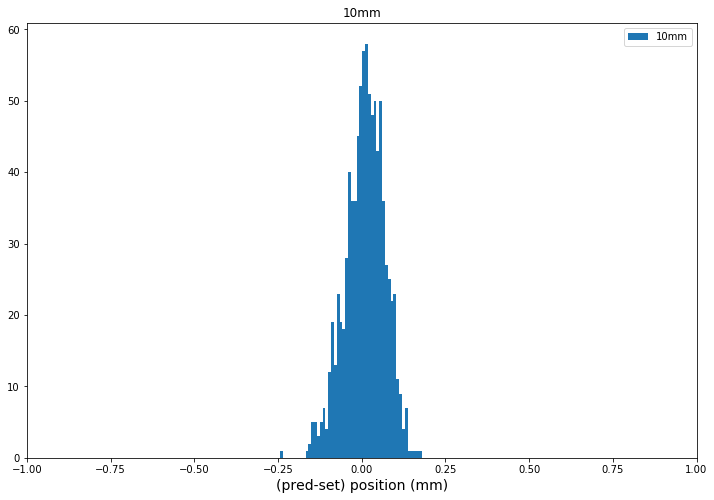

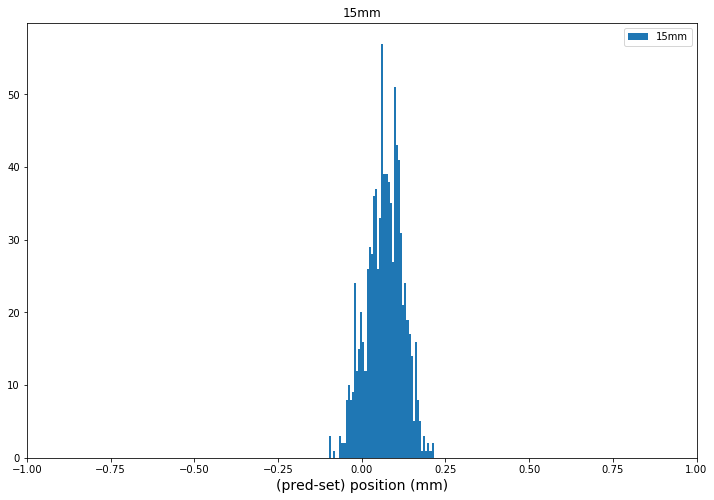

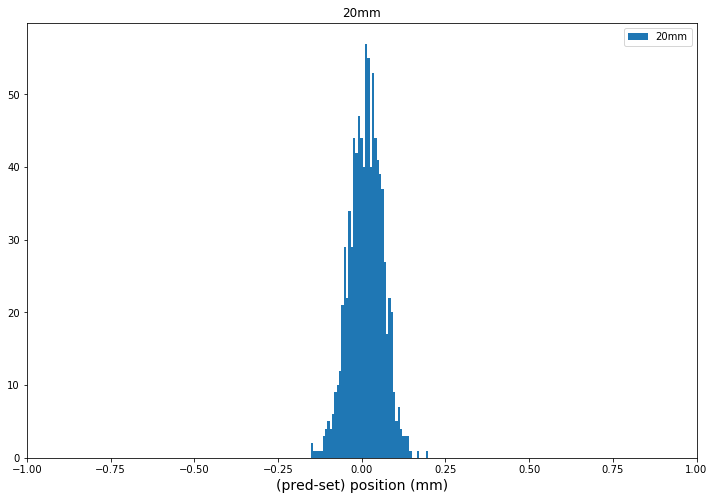

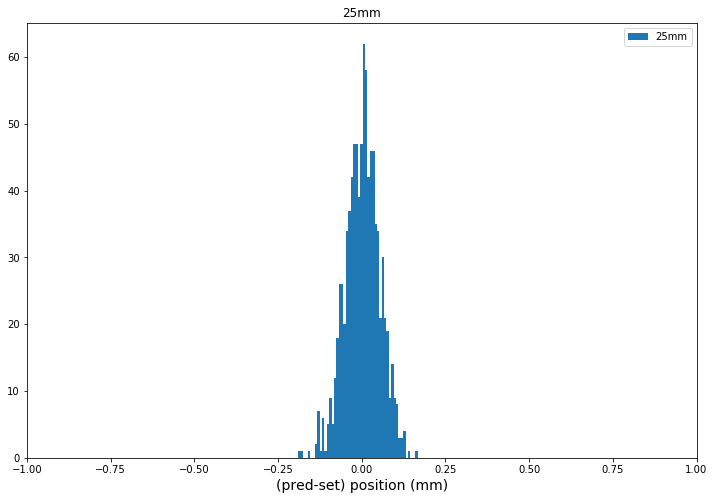

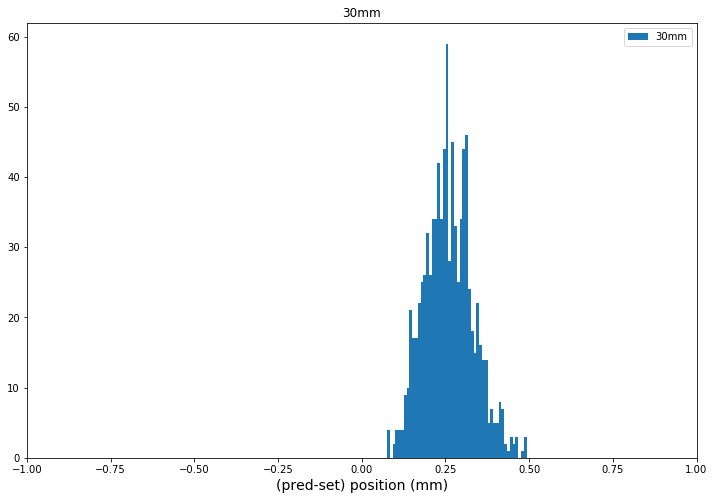

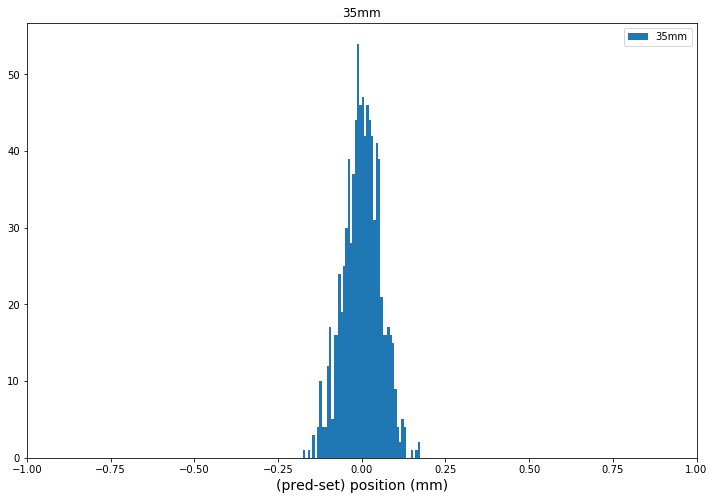

In [20]:

for i, dist in enumerate([1, 2, 3, 4, 10, 15, 20, 25, 30, 35]):
    plt.figure(figsize=(12,8))
    #plt.scatter(np.arange(200), y_pred[i][50:250]-dist, label='{}mm'.format(dist), s=2)
    plt.hist(y_pred[i]-dist, bins=50, label='{}mm'.format(dist))
    plt.xlabel('(pred-set) position (mm)', fontsize=14)
    #plt.ylabel('reconstructed position', fontsize=14)
    plt.title('{}mm'.format(dist))
    plt.legend(loc='upper right')
    plt.xlim(-1,1)
    plt.show()

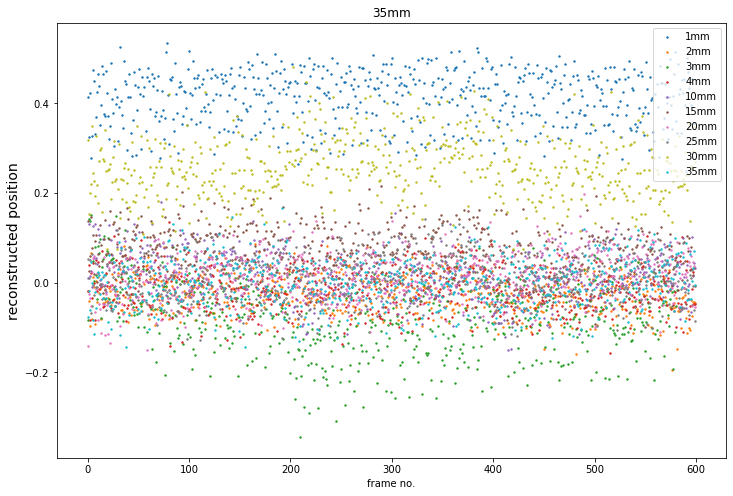

In [113]:
plt.figure(figsize=(12,8))
for i, dist in enumerate([1, 2, 3, 4, 10, 15, 20, 25, 30, 35]):
    #plt.scatter(np.arange(200), y_pred[i][50:250]-dist, label='{}mm'.format(dist), s=2)
    y = np.hstack((y_pred[i][50:250],y_pred[i][350:550],y_pred[i][650:850]))-dist
    plt.scatter(np.arange(len(y)),y ,s= 2, label='{}mm'.format(dist))
    #plt.xlabel('(pred-set) position (mm)', fontsize=14)
    plt.xlabel('frame no.')
    plt.ylabel('reconstructed position', fontsize=14)
    plt.title('{}mm'.format(dist))
plt.legend(loc='upper right')
    #plt.xlim(-1,1)
plt.show()

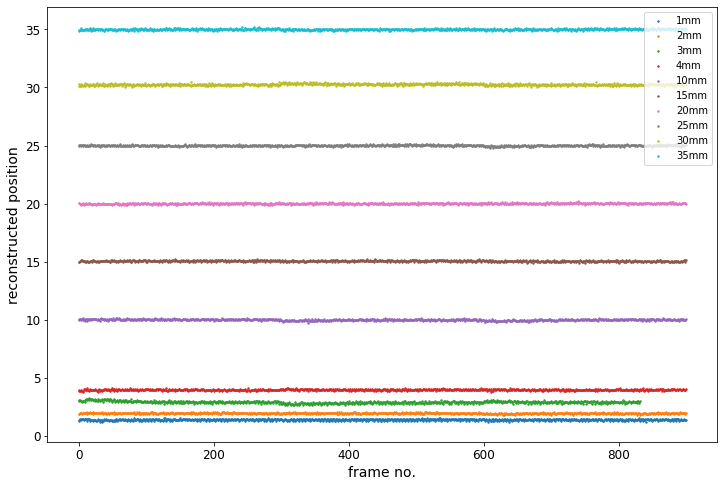

In [56]:
plt.figure(figsize=(12,8))
for i, dist in enumerate([1,2,3,4,10,15,20,25,30,35]):
    y_true_dist =np.ones(len(y_pred[i]))*dist
    y_pred_dist = y_pred[i]
    plt.scatter(np.arange(len(y_true_dist)), y_pred_dist, s=2, label='{}mm'.format(dist))
    
plt.legend(loc='upper right')
plt.xlabel('frame no.', fontsize=14)
plt.ylabel('reconstructed position', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('reco_positions_vs_frame_no.png')

In [5]:
y_pred = np.load('predicted_alldata.npz', allow_pickle=True)['pred']

In [6]:
pred_15 = y_pred[5]
true_15 = np.ones(len(pred_15))*15

In [34]:
from ROOT import TH1F, TF1, TCanvas, gStyle

In [54]:
def gaus_fit_avg(true, preds, n_bins = 50, histo_min = -1.0, histo_max = 1.0, print_sigma=True):
    
    
    mean = np.mean(true-preds)
    histo = TH1F("",
                 '', 
                 n_bins,histo_min,histo_max)
    for i in (true-preds):
        histo.Fill(i)
    canvas = TCanvas()
    f = TF1("f","gaus")
    f.FixParameter(1,mean)

    histo.Fit(f, "S")
    histo.GetXaxis().SetTitle("prediction error (mm)");
    yax=histo.GetYaxis()
    yax.SetLimits(0,500)
    #histo.SetAxisRange(0, 500,"y")
    gStyle.SetOptStat(0)
    gStyle.SetOptFit(0)
    gStyle.SetStatY(0.9)
    gStyle.SetStatX(0.9)
    gStyle.SetStatW(0.15)
    gStyle.SetStatH(0.15)
    histo.Draw()
    canvas.Draw()
    
    if print_sigma:
        sigma = f.GetParameter(2)
        err = f.GetParError(2)
        print('Sigma: {:.5f} ± {:.5f}'.format(sigma, err))
    return histo, canvas, sigma, err

Sigma: 0.05069 ± 0.00271


(<ROOT.TH1F object at 0x559911885a50>,
 <ROOT.TCanvas object ("c1_n15") at 0x55991187b6e0>,
 0.05069445504067214,
 0.002707920500080209)

 FCN=5.73033 FROM MIGRAD    STATUS=CONVERGED      36 CALLS          37 TOTAL
                     EDM=2.09012e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     6.12264e+01   5.44922e+00   5.56521e-03   5.41416e-06
   2  Mean        -8.08000e-02     fixed    
   3  Sigma        5.06945e-02   2.70792e-03   1.80644e-05  -2.41375e-03


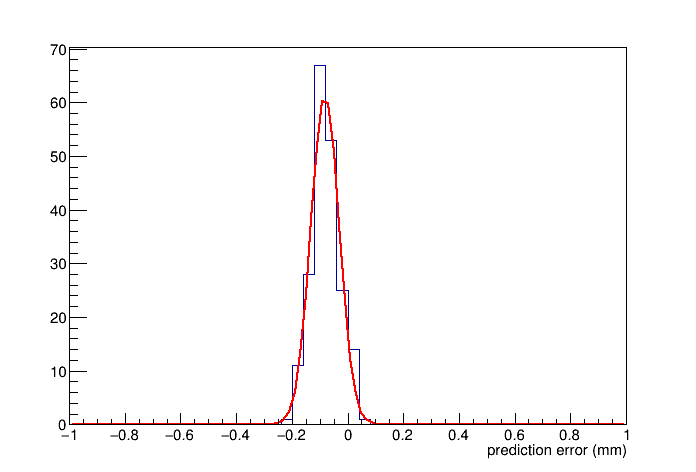

In [55]:
gaus_fit_avg(true_15[50:250], pred_15[50:250])

Sigma: 0.05376 ± 0.00296


(<ROOT.TH1F object at 0x55991188b610>,
 <ROOT.TCanvas object ("c1_n16") at 0x55991188ba00>,
 0.053755251542430826,
 0.0029644594295516816)

 FCN=5.28737 FROM MIGRAD    STATUS=CONVERGED      30 CALLS          31 TOTAL
                     EDM=3.03219e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.79373e+01   5.19204e+00   5.09171e-03   5.62010e-05
   2  Mean        -8.06000e-02     fixed    
   3  Sigma        5.37553e-02   2.96446e-03   1.79454e-05   1.38614e-02


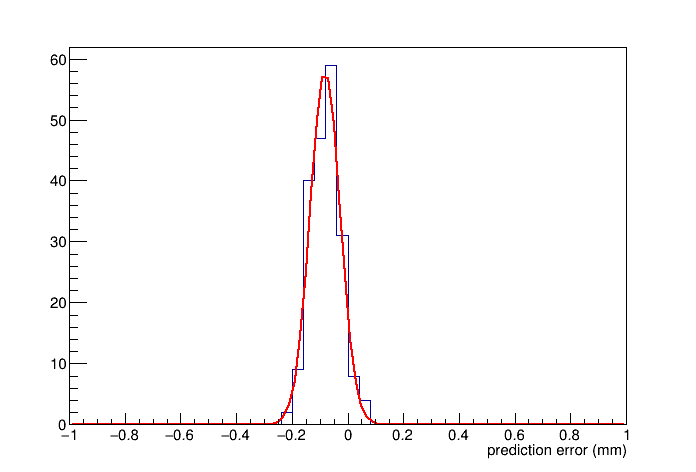

In [56]:
gaus_fit_avg(true_15[350:550], pred_15[350:550])

Sigma: 0.05344 ± 0.00328


(<ROOT.TH1F object at 0x559911895290>,
 <ROOT.TCanvas object ("c1_n17") at 0x559911895ec0>,
 0.05344085404704582,
 0.003279777495685497)

 FCN=10.8848 FROM MIGRAD    STATUS=CONVERGED      40 CALLS          41 TOTAL
                     EDM=2.94156e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.66032e+01   5.33249e+00   6.92862e-03  -1.92081e-07
   2  Mean        -4.62000e-02     fixed    
   3  Sigma        5.34409e-02   3.27978e-03   2.58468e-05   3.50824e-04


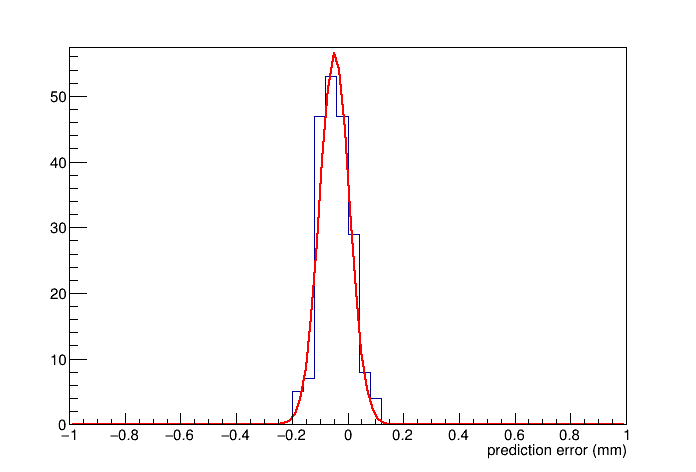

In [57]:
gaus_fit_avg(true_15[650:850], pred_15[650:850])

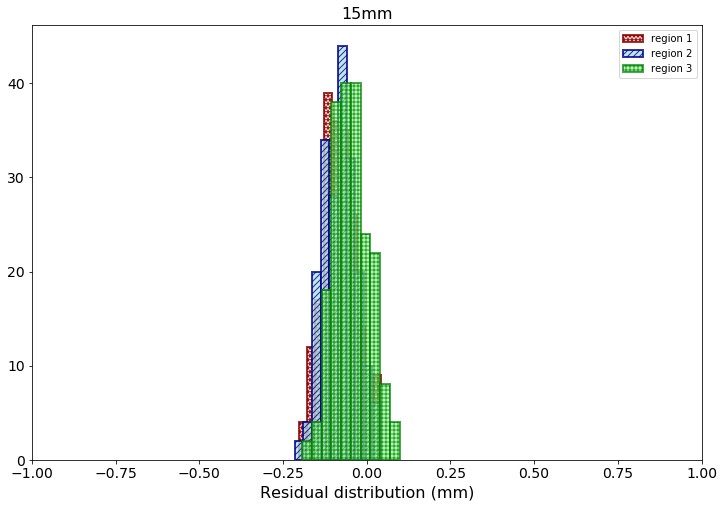

In [293]:
n_bins = 10
plt.figure(figsize=(12,8))
#plt.scatter(np.arange(200), y_pred[i][50:250]-dist, label='{}mm'.format(dist), s=2)
plt.hist(true_15[50:250]-pred_15[50:250], edgecolor= 'darkred', color='mistyrose', 
         bins=n_bins, label='region 1'.format(15), alpha=0.8,fill=True, hatch='***', linewidth=2)
plt.hist(true_15[350:550]-pred_15[350:550], edgecolor= 'darkblue', color='powderblue',
         bins=n_bins, label='region 2'.format(15), alpha=0.8, hatch='//'*2,fill=True, linewidth=2)
plt.hist(true_15[650:850]-pred_15[650:850], edgecolor= 'green',color='palegreen', 
         bins=n_bins, label='region 3'.format(15), alpha=0.7, hatch='+++', linewidth=2)
plt.xlabel('Residual distribution (mm)', fontsize=16)
#plt.ylabel('reconstructed position', fontsize=14)
plt.title('{}mm'.format(15), fontsize=16)
plt.legend(loc='upper right')
plt.xlim(-1,1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('residual_distribution_15mm_subset.png')
plt.show()

-0.08146388053894044 15.081464 15.067839
-0.08003439903259277 15.080034 15.067839
-0.046058120727539065 15.046059 15.067839


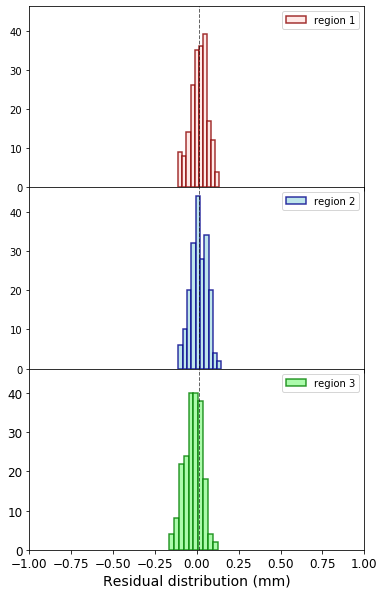

In [357]:
n_bins = 10
fig, axs = plt.subplots(3, sharex=True, sharey=True,  gridspec_kw={'hspace': 0}, figsize=(6, 10))
for edc,inc, htch, (i,sl) in zip(['darkred', 'darkblue','green'], ['mistyrose', 'powderblue', 'palegreen'],
                                ['***', '//'*2,'+++'], 
                                enumerate(slices)):
    
    #plt.scatter(np.arange(200), y_pred[i][50:250]-dist, label='{}mm'.format(dist), s=2)
    print(np.mean(true_15[sl]-pred_15[sl]), np.mean(pred_15[sl]), np.mean(pred_15))
    #axs[i].hist(true_15[sl]-pred_15[sl],
    axs[i].hist(pred_15[sl]-np.mean(pred_15),
             edgecolor= edc, color=inc,
             bins=n_bins, label='region {}'.format(i+1), 
             alpha=0.8,fill=True, 
             hatch=None, 
             linewidth=1.5)
    axs[i].legend(loc='upper right')
    axs[i].axvline(x=np.mean(pred_15[slices[1]]-np.mean(pred_15)), ls='--', alpha=0.6, color='k', linewidth=1)
    #plt.hist(true_15[350:550]-pred_15[350:550], edgecolor= 'darkblue', color='powderblue',
         #bins=n_bins, label='region 2'.format(15), alpha=0.8, hatch='//'*2,fill=True, linewidth=2)
    #plt.hist(true_15[650:850]-pred_15[650:850], edgecolor= 'green',color='palegreen', 
         #bins=n_bins, label='region 3'.format(15), alpha=0.7, hatch='+++', linewidth=2)
plt.xlabel('Residual distribution (mm)', fontsize=14)
    #plt.ylabel('reconstructed position', fontsize=14)
#fig.suptitle('{}mm'.format(15), fontsize=12)
#plt.legend(loc='upper right')
plt.xlim(-1,1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('residual_distribution_15mm_subset_separated.png')
plt.show()

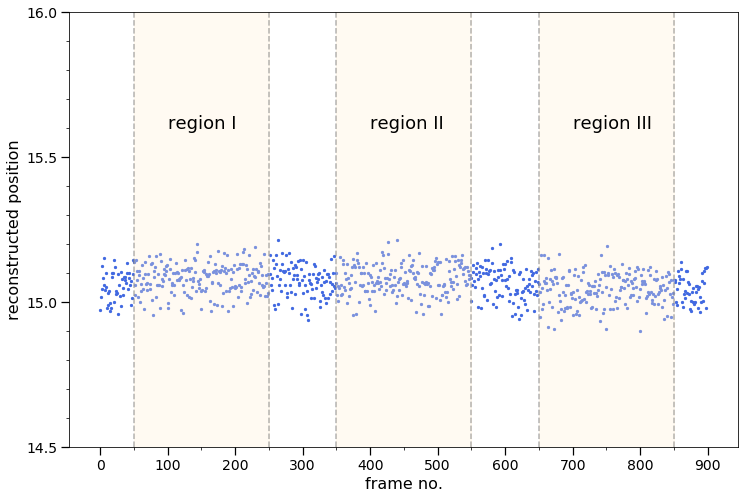

In [348]:
fig, ax = plt.subplots(figsize=(12,8))
x=np.arange(len(true_15))
y=pred_15

#a, b = np.polyfit(x, y, deg=1)
#y_est = a * x + b
#y_err = x.std() * np.sqrt(1/len(x) +(x - x.mean())**2 / np.sum((x - x.mean())**2))/100


sep_color = 'gray'
ax.axvline(x=50, ls='--', alpha=0.6, color=sep_color)
ax.axvline(x=250, ls='--', alpha=0.6, color=sep_color)
ax.axvspan(50, 250, alpha=0.3, color='papayawhip')

ax.axvline(x=350, ls='--', alpha=0.6, color=sep_color)
ax.axvline(x=550, ls='--', alpha=0.6, color=sep_color)
ax.axvspan(350, 550, alpha=0.3, color='papayawhip')

ax.axvline(x=650, ls='--', alpha=0.6, color=sep_color)
ax.axvline(x=850, ls='--', alpha=0.6, color=sep_color)
ax.axvspan(650, 850, alpha=0.3, color='papayawhip')

ax.xaxis.set_major_locator(MultipleLocator(100))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(50))

ax.tick_params(which='major', width=1.25, length=8, labelsize=14)
ax.tick_params(which='minor', width=0.75, length=3)
ax.yaxis.set_major_locator(MultipleLocator(.5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_minor_locator(MultipleLocator(.1))

text_color = 'k'

plt.text(x=100,y=15.6, s='region I', fontsize=18, color = text_color)
plt.text(x=400,y=15.6, s='region II', fontsize=18, color=text_color)
plt.text(x=700,y=15.6, s='region III', fontsize=18, color=text_color)

ax.scatter(x, y, s=5, label='reconstructed {}mm'.format(15), color='royalblue')



#ax.legend(loc='upper right', fontsize='x-large')
ax.set_xlabel('frame no.', fontsize=16)
ax.set_ylabel('reconstructed position', fontsize=16)
ax.set_ylim(14.5, 16)
plt.savefig('reco_positions_vs_frame_no.png')

In [8]:
slices = [slice(50, 250), slice(350, 550), slice(650, 850)]

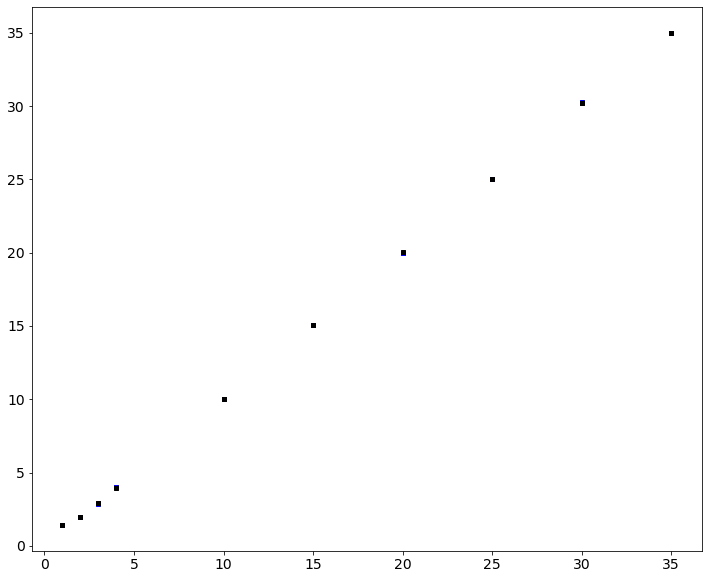

In [109]:
plt.figure(figsize=(12,10))
for d, preds in zip(distances, y_pred):
    for (i,sl) ,c in zip(enumerate(slices),['red','blue','black']):
        
        #print(d, np.mean(preds[sl]), np.std(preds[sl]))
        plt.errorbar(x=d, y=np.mean(preds[sl]),
                     yerr=np.std(preds[sl]), fmt='s',
                    markersize=4, capsize=2, c=c,ecolor=c, label='run {}'.format(i))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.ylim(-0.5,1)
#plt.legend(loc='upper right')
plt.show()

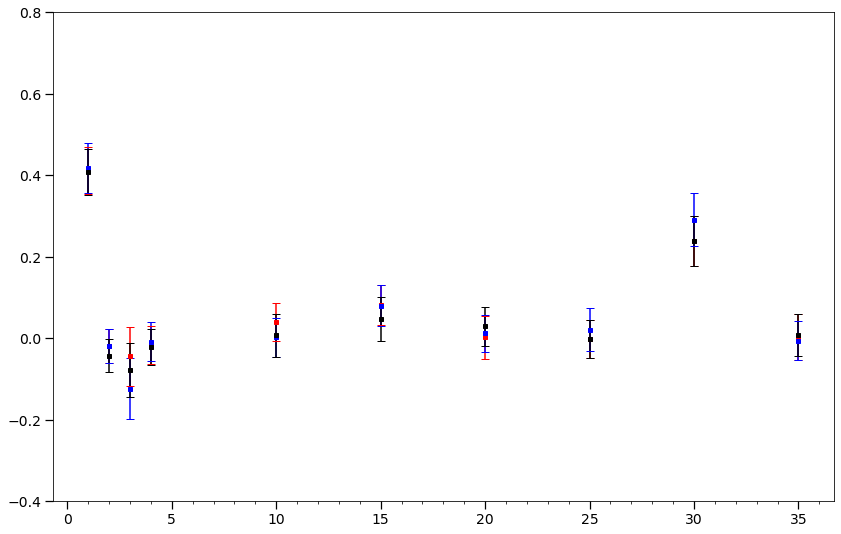

In [160]:
fig, ax = plt.subplots(figsize=(14,9))
for d, preds in zip(distances, y_pred):
    for (i,sl) ,c in zip(enumerate(slices),['red','blue','black']):
        
        #print(d, np.mean(preds[sl]), np.std(preds[sl]))
        ax.errorbar(x=d, y=np.mean(preds[sl])-d,
                     yerr=np.std(preds[sl]), fmt='s',
                    markersize=4, capsize=4, c=c,ecolor=c, label='run {}'.format(i))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', width=1.25, length=8, labelsize=14)
ax.tick_params(which='minor', width=0.75, length=3)
ax.set_ylim(-0.4,0.8)
#plt.legend(loc='upper right')
plt.show()

In [118]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [129]:
first = [pred[slices[0]] for pred in y_pred]
second = [pred[slices[1]] for pred in y_pred]
third = [pred[slices[2]] for pred in y_pred]

In [130]:
stds_first = [np.std(f) for f in first]
stds_second = [np.std(f) for f in second]
stds_third = [np.std(f) for f in third]

In [139]:
m_first = [np.mean(f) for f in first]
m_second = [np.mean(f) for f in second]
m_third = [np.mean(f) for f in third]

In [140]:
delta_first = [m - d for m, d in zip(m_first, distances)]
delta_second = [m - d for m, d in zip(m_second, distances)]
delta_third = [m - d for m, d in zip(m_third, distances)]

In [141]:
abs_delta_first = [np.abs(m - d) for m, d in zip(m_first, distances)]
abs_delta_second = [np.abs(m - d) for m, d in zip(m_second, distances)]
abs_delta_third = [np.abs(m - d) for m, d in zip(m_third, distances)]

In [142]:
m_first = np.asarray(m_first)
m_second = np.asarray(m_second)
m_third = np.asarray(m_third)

In [143]:
m_first[0] -= .4
m_first[4] -= 5
m_first[5] -= 9
m_first[6] -= 13
m_first[7] -= 17
m_first[8] -= 21.3
m_first[9] -= 25

In [144]:
m_second[0] -= .4
m_second[4] -= 5
m_second[5] -= 9
m_second[6] -= 13
m_second[7] -= 17
m_second[8] -= 21.3
m_second[9] -= 25

In [145]:
m_third[0] -= .4
m_third[4] -= 5
m_third[5] -= 9
m_third[6] -= 13
m_third[7] -= 17
m_third[8] -= 21.3
m_third[9] -= 25

In [211]:
dist_str = [str(d)+' mm' for d in distances]

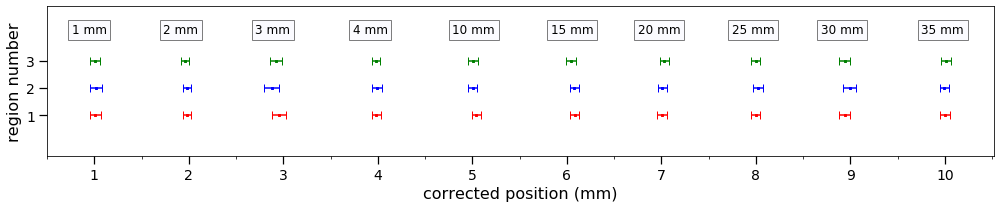

In [347]:
fig, ax = plt.subplots(figsize=(14,3))


ax.errorbar(x=m_first, y=np.ones(10),
               xerr=stds_first, fmt='s',
                markersize=2, capsize=4, c= 'red',
                ecolor='red' , 
                label='run {}'.format(1))

ax.errorbar(x=m_second, y=np.ones(10)*2,
               xerr=stds_second, fmt='s',
                markersize=2, capsize=4, c= 'blue',
                ecolor='blue' , 
                label='run {}'.format(2))
ax.errorbar(x=m_third, y=np.ones(10)*3,
       xerr=stds_third, fmt='s',
        markersize=2, capsize=4, c= 'green',
        ecolor='green' , 
        label='run {}'.format(3))
props = dict(boxstyle='square', facecolor='ghostwhite', alpha=0.5)
for i in range(10):
    ax.text(x=m_first[i]-0.25, y=(np.ones(10)*4.)[i], s=dist_str[i], fontsize=12,  bbox=props)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(.5))
ax.tick_params(which='major', width=1.25, length=8, labelsize=14)
ax.tick_params(which='minor', width=0.75, length=3)
ax.set_yticks([1,2,3])
ax.set_ylim(-0.5,5)
ax.set_xlabel('corrected position (mm)', fontsize=16)
ax.set_ylabel('region number', fontsize=16)
plt.tight_layout()
#plt.legend(ncol=3,loc='lower right', fontsize='large', facecolor='ghostwhite')
plt.savefig('estimations_runs_vs_positions_shift_boxes.png')
plt.show()

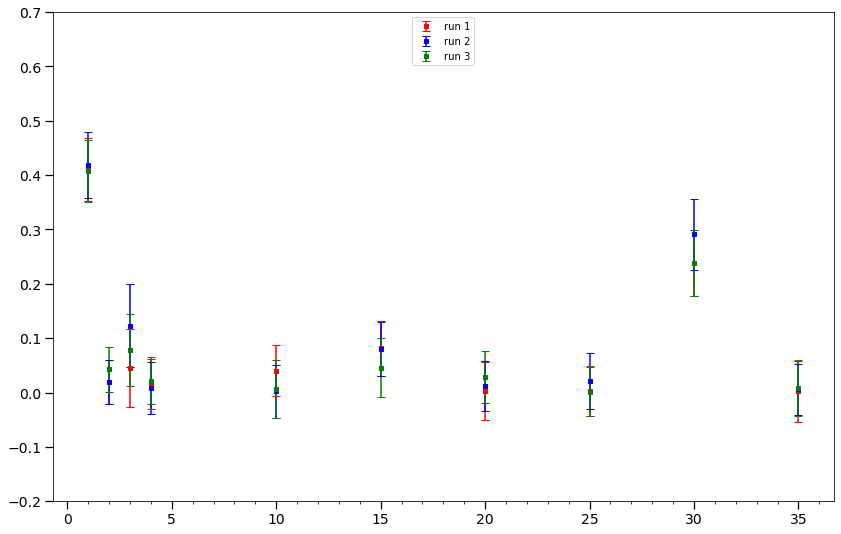

In [17]:
fig, ax = plt.subplots(figsize=(14,9))


ax.errorbar(x=distances, y=abs_delta_first,
               yerr=stds_first, fmt='s',
                markersize=4, capsize=4, c= 'red',
                ecolor='red' , 
                label='run {}'.format(1))

ax.errorbar(x=distances, y=abs_delta_second,
               yerr=stds_second, fmt='s',
                markersize=4, capsize=4, c= 'blue',
                ecolor='blue' , 
                label='run {}'.format(2))
ax.errorbar(x=distances, y=abs_delta_third,
       yerr=stds_third, fmt='s',
        markersize=4, capsize=4, c= 'green',
        ecolor='green' , 
        label='run {}'.format(3))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', width=1.25, length=8, labelsize=14)
ax.tick_params(which='minor', width=0.75, length=3)
ax.set_ylim(-0.2,0.7)
plt.legend(loc='upper center')
plt.savefig('abs_delta_runs_vs_positions.png')
plt.show()

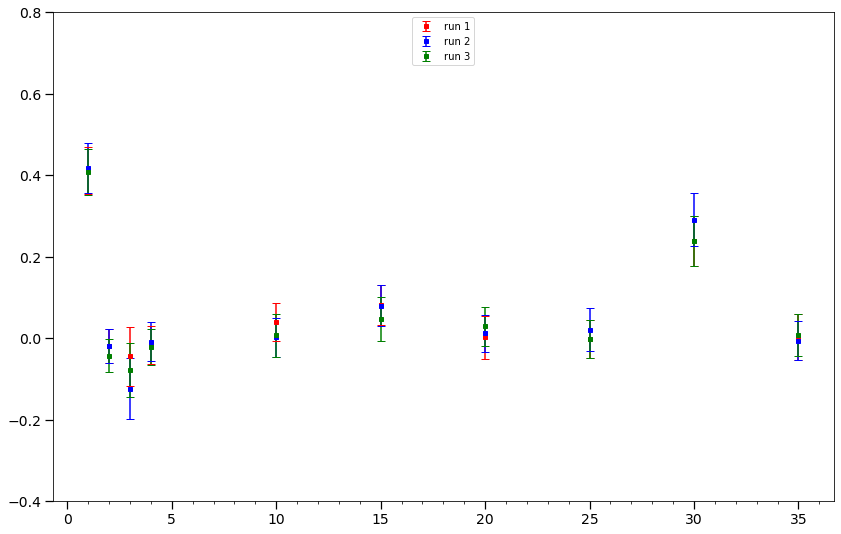

In [16]:
fig, ax = plt.subplots(figsize=(14,9))


ax.errorbar(x=distances, y=delta_first,
               yerr=stds_first, fmt='s',
                markersize=4, capsize=4, c= 'red',
                ecolor='red' , 
                label='run {}'.format(1))

ax.errorbar(x=distances, y=delta_second,
               yerr=stds_second, fmt='s',
                markersize=4, capsize=4, c= 'blue',
                ecolor='blue' , 
                label='run {}'.format(2))
ax.errorbar(x=distances, y=delta_third,
       yerr=stds_third, fmt='s',
        markersize=4, capsize=4, c= 'green',
        ecolor='green' , 
        label='run {}'.format(3))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', width=1.25, length=8, labelsize=14)
ax.tick_params(which='minor', width=0.75, length=3)
ax.set_ylim(-0.4,0.8)
plt.legend(loc='upper center')
plt.savefig('delta_runs_vs_positions.png')
plt.show()

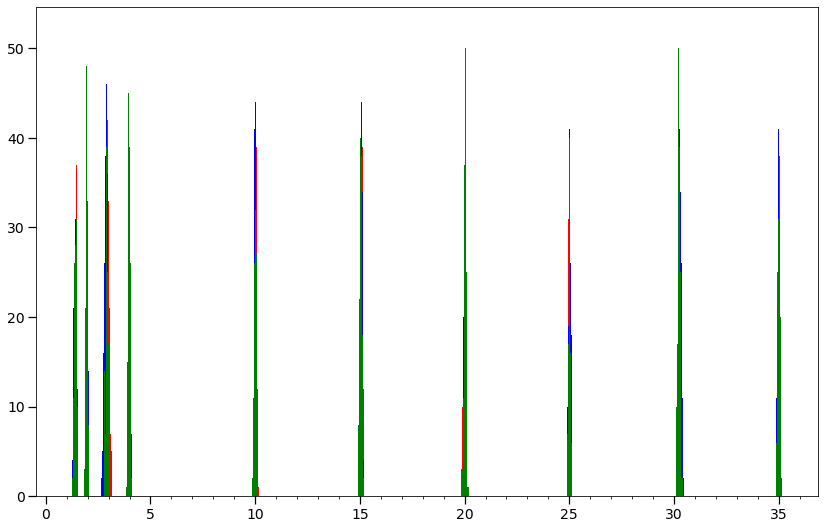

In [171]:
fig, ax = plt.subplots(figsize=(14,9))

for d, preds in zip(distances, y_pred):
    for (i,sl) ,c in zip(enumerate(slices),['red','blue','green']):
        
        #print(d, np.mean(preds[sl]), np.std(preds[sl]))
        ax.hist(preds[sl], color=c, label='run {}'.format(i))
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(which='major', width=1.25, length=8, labelsize=14)
ax.tick_params(which='minor', width=0.75, length=3)
#ax.set_ylim(0,4)
#plt.legend(loc='upper right')
plt.show()